<center><h1>Professor Bianco's Code</h1></center>

# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [8]:
#dropping some data I no longer need
df = df[["tripduration", "gender", "ageM", "ageF"]]
df.head()

,tripduration,gender,ageM,ageF
0,1346,2,NaN,55.0
1,363,1,52.0,NaN
2,346,1,41.0,NaN
3,182,1,46.0,NaN
4,969,1,38.0,NaN


In [9]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,gender,ageM,ageF
count,285552.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,1.162485,40.305272,38.951145
std,900.775928,0.419490,11.595240,11.405112
min,60.000000,0.000000,16.000000,17.000000
25%,334.000000,1.000000,NaN,NaN
50%,504.000000,1.000000,NaN,NaN
75%,772.000000,1.000000,NaN,NaN
max,43023.000000,2.000000,116.000000,89.000000


In [10]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

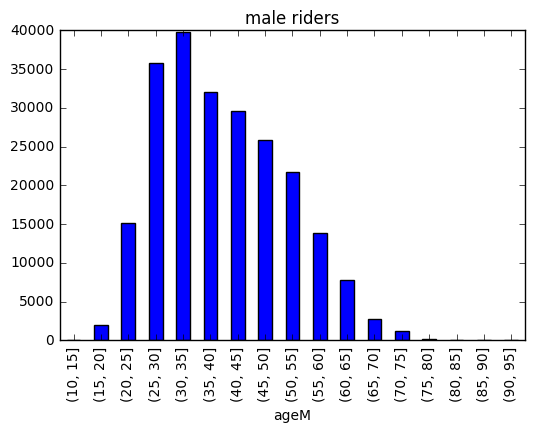

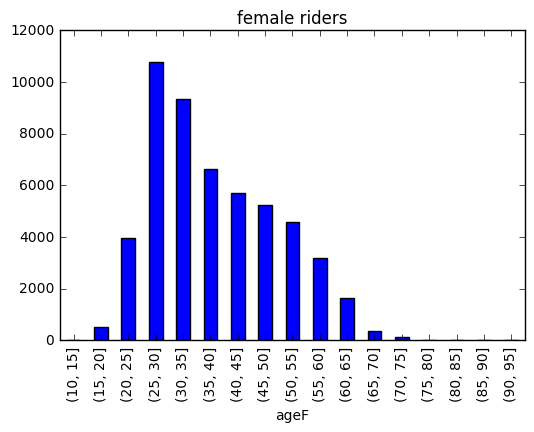

In [11]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


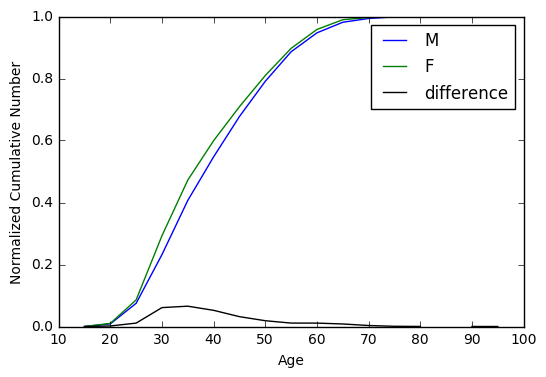

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there amay be Nan values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [13]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [14]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)


The scipy.stats KS test already tells me the significance and the p-value. I recalculate it for a reality check.

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/



In [15]:
# notice that the factor is very large!! its gonna be hard to get a stat larger than that!
np.sqrt((len(df['ageF']) + len(df['ageM']))/len(df['ageF']) * len(df['ageM']))

1106.1676246107415

In [39]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!

<img src="https://render.githubusercontent.com/render/math?math=D_KS%28n1%2Cn2%29%20%26gt%3B%20c%28%5Calpha%29%20%5Csqrt%7B%5Cfrac%7B%28n1%20%2B%20n2%29%7D%7Bn1n2%7D%7D&mode=inline">

---

<center><h1>My Code</h1></center>

# FILL IN THE CELLS BELOW!

In [17]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

### The KS test returned an extremely small p-value, which means that we reject the null hypothesis that the underlying distribution is the same for both `ageF` and `ageM`.

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [18]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
df_ks = df.iloc[np.arange(1, 285552, 200)]
df_ks.shape

(1428, 4)

In [19]:
ks2 = scipy.stats.ks_2samp(df_ks.ageM, df_ks.ageF)
print (ks2)

Ks_2sampResult(statistic=0.59243697478991597, pvalue=4.027963927017588e-220)


### The Kolmogorov-Smirnov test for the reducted dataset with $n=1428$ returned a p-value much smaller than the previous test, which means that we reject the null hypothesis that `AgeF` and `AgeM` have the same underlying cumulative distribution.

---

# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [20]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

In [21]:
help(scipy.stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 

In [22]:
max_ageF = len(df["ageF"].dropna())
sorted_ageF = sort(df["ageF"].dropna())

In [23]:
# I've found that different ways of subsetting the data affects the p-value
r_val = []; p_val = []
for i in range(1,200):
    np.random.seed(i)
    ind = np.random.randint(1, max_ageF, max_ageF)
    sorted_ageM = sort(df["ageM"].dropna())[ind]
    pear = scipy.stats.pearsonr(sorted_ageF, sorted_ageM)
    r_val.append(pear[0])
    p_val.append(pear[1])

In [24]:
print("r: {}".format(np.mean(r_val)), "p-value: {}".format(np.mean(p_val)))

r: 0.0002786071157069399 p-value: 0.5501934336693434


### The Pearson's test for correlation examines whether if there exists a linear relationship between two populations. We assume that `AgeF` and `AgeM` are normally distributed. The null hypothesis of this test is that there are no linear relationship between `AgeF` and `AgeM`, i.e., $\rho=0$, and the alternative hypothesis of this test is that there exists a linear relationship with Pearson's correlation $\rho \neq 0$.

### Because the test result varies for different methods of subsetting the `AgeM` data to match the smaller size of `AgeF`, we take the average values from 200 tests and conclude that because $p=0.55>\alpha=0.05$, we cannot reject the null hypothesis.

---

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [25]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

In [26]:
help(scipy.stats.spearmanr)

Help on function spearmanr in module scipy.stats.stats:

spearmanr(a, b=None, axis=0, nan_policy='propagate')
    Calculates a Spearman rank-order correlation coefficient and the p-value
    to test for non-correlation.
    
    The Spearman correlation is a nonparametric measure of the monotonicity
    of the relationship between two datasets. Unlike the Pearson correlation,
    the Spearman correlation does not assume that both datasets are normally
    distributed. Like other correlation coefficients, this one varies
    between -1 and +1 with 0 implying no correlation. Correlations of -1 or
    +1 imply an exact monotonic relationship. Positive correlations imply that
    as x increases, so does y. Negative correlations imply that as x
    increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-values are not

In [27]:
max_ageF = len(df["ageF"].dropna())
sorted_ageF = sort(df["ageF"].dropna())

In [28]:
# The same goes for Spearman's test
rs_val = []; p_val2 = []
for i in range(1,200):
    np.random.seed(i)
    ind = np.random.randint(1, max_ageF, max_ageF)
    sorted_ageM = sort(df["ageM"].dropna())[ind]
    pear = scipy.stats.spearmanr(sorted_ageF, sorted_ageM)
    rs_val.append(pear[0])
    p_val2.append(pear[1])

In [29]:
print("r: {}".format(np.mean(rs_val)), "p-value: {}".format(np.mean(p_val2)))

r: 0.00027692002913091724 p-value: 0.5627106661334538


## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

### The Spearman's correlation coefficient $r_s$ is a statistical measure that examines the strength of the monotonic relationship between paired data. The null hypothesis for Spearman's test is that there is no monotonic relationship between `AgeF` and `AgeM`, i.e., $\rho_s=0$. 

### Like the Pearson's test, we take the average values from 200 tests and conclude that because $p=0.56>\alpha=0.05$, we cannot reject the null hypothesis.

---

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!



In [30]:
# Get data from June 2015
datestring = '201509'
getCitiBikeCSV(datestring)

file in place, you can continue


In [31]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()

In [32]:
get_isDay = lambda x: 1 if (int(x[-8:-6]) <= 12) else 0
df2["isDay"] = df2["starttime"].apply(get_isDay)

In [33]:
df2 = df2[df2["usertype"] == "Subscriber"]
df2 = df2[["isDay", "birth year"]]

In [34]:
df2["riderD"] = 2015 - df2["birth year"][df2["isDay"] == 1]
df2["riderN"] = 2015 - df2["birth year"][df2["isDay"] == 0]

In [35]:
df2.head()

,isDay,birth year,riderD,riderN
0,1,1989.0,26.0,NaN
1,1,1987.0,28.0,NaN
3,1,1992.0,23.0,NaN
4,1,1976.0,39.0,NaN
5,1,1955.0,60.0,NaN


In [36]:
df2.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,isDay,birth year,riderD,riderN
count,1.079586e+06,1.079586e+06,419015.000000,660571.000000
mean,3.881256e-01,1.977307e+03,38.206845,37.366979
std,4.873237e-01,1.150723e+01,11.562485,11.460108
min,0.000000e+00,1.885000e+03,16.000000,16.000000
25%,0.000000e+00,1.969000e+03,NaN,NaN
50%,0.000000e+00,1.980000e+03,NaN,NaN
75%,1.000000e+00,1.986000e+03,NaN,NaN
max,1.000000e+00,1.999000e+03,130.000000,130.000000


In [37]:
ks3 = scipy.stats.ks_2samp(df2.riderD, df2.riderN)
print(ks3)

Ks_2sampResult(statistic=0.22374873331073203, pvalue=0.0)


### The Kolmogorov-Smirnov test for `riderD` and `riderN` returned a p-value of zero, which means that we reject the null hypothesis that `riderD` and `riderN` have the same underlying cumulative distribution. 

---